In [2]:
import json
from os import walk
from os.path import isfile, join
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [11]:
filepath = "/Users/matt/repos/thermal_state_prep/numerics/data/two_level/beta_sys.json"
with open(filepath) as f:
    j = json.load(f)
    inputs = j["inputs"]
    outputs = j["outputs"]
    num_samples = j["num_samples"]
    dim_sys = j["dim_sys"]
    label = j["label"]
    if len(inputs) != len(outputs):
        raise Exception("inputs and outputs are not the same length.")
    print("len of inputs: ", len(inputs))
alphas, beta_envs, beta_syss, times = set(), set(), set(), set()
for (alpha, beta_env, beta_sys, time) in inputs:
    alphas.add(alpha)
    beta_envs.add(beta_env)
    beta_syss.add(beta_sys)
    times.add(time)
alphas = list(alphas)
alphas.sort()
beta_envs = list(beta_envs)
beta_envs.sort()
beta_syss = list(beta_syss)
beta_syss.sort()
times = list(times)
times.sort()

print("alphas")
print(alphas)
print("beta_envs")
print(beta_envs)
print("beta_syss")
print(beta_syss)
print("times")
print(times)
    

len of inputs:  200
alphas
[4.9999999999999996e-05, 0.00023207944168063908, 0.0010772173450159421, 0.004999999999999999]
beta_envs
[1.0]
beta_syss
[0.1, 0.10481131341546858, 0.10985411419875583, 0.11513953993264472, 0.12067926406393285, 0.12648552168552962, 0.13257113655901093, 0.13894954943731375, 0.14563484775012436, 0.15264179671752334, 0.15998587196060582, 0.16768329368110083, 0.1757510624854792, 0.1842069969326716, 0.193069772888325, 0.20235896477251566, 0.21209508879201905, 0.22229964825261944, 0.2329951810515372, 0.2442053094548651, 0.2559547922699536, 0.2682695795279726, 0.281176869797423, 0.29470517025518106, 0.3088843596477481, 0.3237457542817644, 0.3393221771895328, 0.35564803062231287, 0.372759372031494, 0.3906939937054617, 0.4094915062380424, 0.42919342601287774, 0.44984326689694454, 0.47148663634573934, 0.49417133613238345, 0.517947467923121, 0.5428675439323859, 0.5689866029018296, 0.5963623316594643, 0.6250551925273972, 0.6551285568595507, 0.6866488450043, 0.719685673001

len alpha_fixed_params: 5
beta_env, beta_sys, time 1.0 1.0 100.0
alpha, mean_dist =  0.1 ,  0.03046778319614931
alpha, mean_dist =  0.07906043210907701 ,  0.025472237133787493
alpha, mean_dist =  0.06250551925273973 ,  0.019638806130028094
alpha, mean_dist =  0.04941713361323833 ,  0.014854642746863801
alpha, mean_dist =  0.03906939937054617 ,  0.011603249435598395
alpha, mean_dist =  0.030888435964774818 ,  0.009186840229559968
alpha, mean_dist =  0.02442053094548651 ,  0.0072085715478501676
alpha, mean_dist =  0.019306977288832496 ,  0.0053191830085318435
alpha, mean_dist =  0.015264179671752334 ,  0.004211800102732918
alpha, mean_dist =  0.012067926406393288 ,  0.003142609903271697
alpha, mean_dist =  0.009540954763499945 ,  0.0025939306448201954
alpha, mean_dist =  0.007543120063354615 ,  0.002125057778080622
alpha, mean_dist =  0.005963623316594642 ,  0.0016219420891526507
alpha, mean_dist =  0.004714866363457394 ,  0.001296332671721552
alpha, mean_dist =  0.003727593720314938 ,  

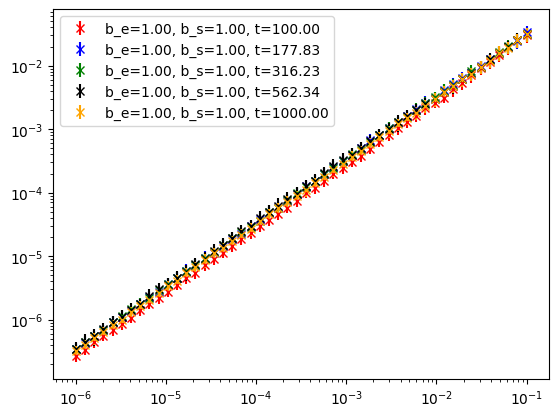

In [7]:

alpha_fixed_params = [(beta_envs[0], beta_syss[0], times[ix]) for ix in range(0, len(times))]
print("len alpha_fixed_params:", len(alpha_fixed_params))
fig = plt.figure()
colors = ['r', 'b', 'g', 'black', 'orange', 'grey']
color_count = 0
for ( beta_env_0, beta_sys_0, time_0) in alpha_fixed_params:
    print("beta_env, beta_sys, time", beta_env_0, beta_sys_0, time_0)
    x = []
    y = []
    yerr = []
    for ix in range(len(inputs)):
        (alpha, beta_env, beta_sys, time) = inputs[ix]
        (original_dist, mean_dist, std_dist, dist_of_mean) = outputs[ix]
        if beta_sys == beta_sys_0 and beta_env == beta_env_0 and time == time_0:
            x.append(alpha)
            y.append(-original_dist + mean_dist)
            yerr.append(std_dist)

            print("alpha, mean_dist = ", alpha, ", ", mean_dist)
    plt.errorbar(x, y, yerr, marker='x', linestyle='none', label="b_e={:.2f}, b_s={:.2f}, t={:.2f}".format(beta_env_0, beta_sys_0, time_0), color=colors[color_count])
    color_count += 1
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

alpha, beta_env, time 4.9999999999999996e-05 1.0 200.0
beta_sys =  0.1 , mean_dist =  0.41215059412040145 , original_dist =  0.4121587823021296
beta_sys =  0.10481131341546858 , mean_dist =  0.40975110064200715 , original_dist =  0.40975942271679966
beta_sys =  0.10985411419875583 , mean_dist =  0.4072371983872993 , original_dist =  0.4072452715547223
beta_sys =  0.11513953993264472 , mean_dist =  0.4046026460917061 , original_dist =  0.40461090383904247
beta_sys =  0.12067926406393285 , mean_dist =  0.40184251343079663 , original_dist =  0.40185064834651596
beta_sys =  0.12648552168552962 , mean_dist =  0.39895043927833246 , original_dist =  0.3989585779765297
beta_sys =  0.13257113655901093 , mean_dist =  0.3959205653617895 , original_dist =  0.39592849998738106
beta_sys =  0.13894954943731375 , mean_dist =  0.39274605805151014 , original_dist =  0.3927539461421818
beta_sys =  0.14563484775012436 , mean_dist =  0.3894204551569382 , original_dist =  0.3894281628158281
beta_sys =  0.15

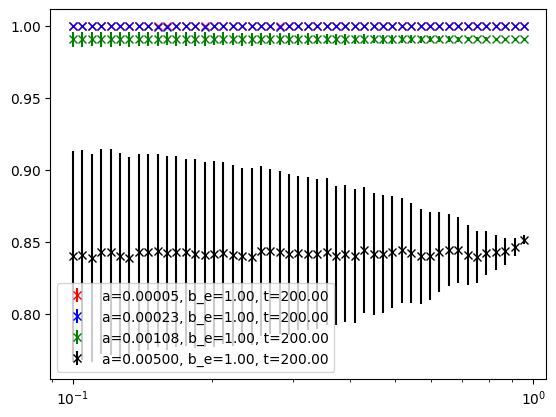

In [12]:
beta_sys_fixed_params = [(alphas[ix], beta_envs[0], times[0]) for ix in range(len(alphas))]
fig = plt.figure()
colors = ['r', 'b', 'g', 'black', 'orange']
color_count = 0
for (alpha_0, beta_env_0, time_0) in beta_sys_fixed_params:
    print("alpha, beta_env, time", alpha_0, beta_env_0, time_0)
    x = []
    y = []
    yerr = []
    for ix in range(len(inputs)):
        (alpha, beta_env, beta_sys, time) = inputs[ix]
        (original_dist, mean_dist, std_dist, dist_of_mean) = outputs[ix]
        if original_dist < 1e-3:
            continue
        if alpha == alpha_0 and beta_env == beta_env_0 and time == time_0:
            x.append(beta_sys)
            y.append(mean_dist / original_dist)
            yerr.append(std_dist)

            print("beta_sys = ", beta_sys, ", mean_dist = ", mean_dist, ", original_dist = ", original_dist)
    plt.errorbar(x, y, yerr, marker='x', linestyle='none', label="a={:.5f}, b_e={:.2f}, t={:.2f}".format(alpha_0, beta_env_0, time_0), color=colors[color_count])
    color_count += 1
# plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()